In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv(r'/Users/divyashahi/OneDrive - Adobe/Machine_Leaning_Material/income.csv')

In [22]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


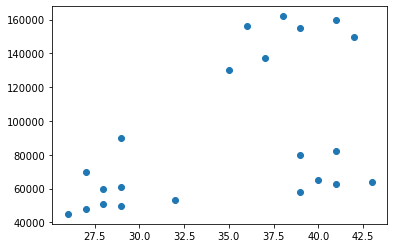

In [23]:
#draw scatter plot
plt.scatter(df['Age'], df['Income($)'])

In [24]:
#above we get three cluster


In [25]:
#building regressor
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [26]:
#prepare model fit and predict
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [27]:
#all points assigned different label with 2, 1, 0

In [28]:
#to visualize these 
#going to append these columns
df['cluster'] = y_predicted

In [29]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


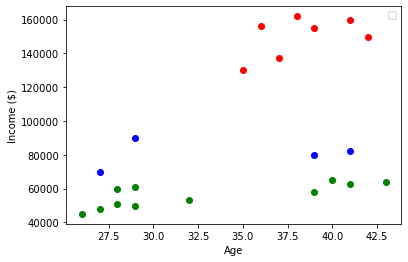

In [30]:
#need to separeate three different cluster to three different data frame
#get all points where cluster label is assigned 0, 1, 2
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
#going to plot these points
plt.scatter(df0['Age'], df0['Income($)'], color = 'green')
plt.scatter(df1['Age'], df1['Income($)'], color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [31]:
#our plotting is not that accurate this problem arised because our scaling is not accurate

In [37]:
#so need to scale our feture properly
#My min max scaler will try to do scaling from 0 to 1

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
df


,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [39]:
#here now the income is scaled need to do the samething for age
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [41]:
#train our scaled data set
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [42]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No handles with labels found to put in legend.


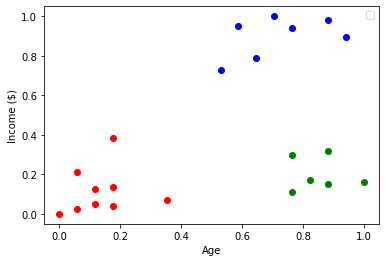

In [43]:
#need to separeate three different cluster to three different data frame
#get all points where cluster label is assigned 0, 1, 2
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
#going to plot these points
plt.scatter(df0['Age'], df0['Income($)'], color = 'green')
plt.scatter(df1['Age'], df1['Income($)'], color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
#now the graph looks good

In [44]:
#printing centroid
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

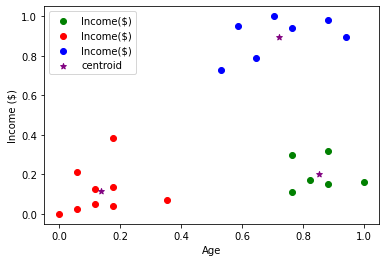

In [49]:
#plotting centroid on scatter plot
#need to separeate three different cluster to three different data frame
#get all points where cluster label is assigned 0, 1, 2
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
#going to plot these points
plt.scatter(df0['Age'], df0['Income($)'], color = 'green', label='Income($)')
plt.scatter(df1['Age'], df1['Income($)'], color = 'red' , label='Income($)')
plt.scatter(df2['Age'], df2['Income($)'], color = 'blue' , label='Income($)')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color='purple', marker = '*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [51]:
#if data is complex in different dimesnion we use algo method
#
k_range = range(1, 10)
#sum of sq error is an array
sse = []
#plotting them in matplotlib
for k in k_range :
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age', 'Income($)']])
    #inertia will give some of square error
    sse.append(km.inertia_)
    
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009395,
 0.16869711728567788,
 0.13265419827245162,
 0.10383752586603562]

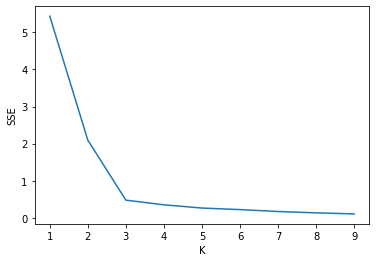

In [53]:
#lets plot it and see on the scatter plot
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_range, sse)

In [54]:
#k = 3 is my elbow